In [64]:
import numpy  as np
import pandas as pd

In [65]:
df=pd.read_csv('haberman.data')

In [66]:
df

30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]

In [67]:
df.columns=['age','patient_year','axillary nodes','survival_status']

In [68]:
df

age  patient_year  axillary nodes  survival_status
0     30            62               3                1
1     30            65               0                1
2     31            59               2                1
3     31            65               4                1
4     33            58              10                1
..   ...           ...             ...              ...
300   75            62               1                1
301   76            67               0                1
302   77            65               3                1
303   78            65               1                2
304   83            58               2                2

[305 rows x 4 columns]

In [69]:
cols=[1,2,3]
X=df[df.columns[cols]]

In [70]:
y=df['survival_status']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
'''import numpy as np

def L1_distance(x1, x2):
    """Calculate L1 distance between two vectors"""
    return np.sum(np.abs(x1 - x2))

def L2_distance(x1, x2):
    """Calculate L2 distance between two vectors"""
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=1, distance_metric='L2'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for x_test in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                if self.distance_metric == 'L1':
                    dist = L1_distance(x_test, x_train)
                else:
                    dist = L2_distance(x_test, x_train)
                distances.append((dist, i))
            distances = sorted(distances)
            k_nearest_indices = [index for _, index in distances[:self.k]]
            k_nearest_labels = [self.y_train[index] for index in k_nearest_indices]
            y_pred.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
        return np.array(y_pred)'''


'import numpy as np\n\ndef L1_distance(x1, x2):\n    """Calculate L1 distance between two vectors"""\n    return np.sum(np.abs(x1 - x2))\n\ndef L2_distance(x1, x2):\n    """Calculate L2 distance between two vectors"""\n    return np.sqrt(np.sum((x1 - x2) ** 2))\n\nclass KNN:\n    def __init__(self, k=1, distance_metric=\'L2\'):\n        self.k = k\n        self.distance_metric = distance_metric\n    \n    def fit(self, X_train, y_train):\n        self.X_train = X_train\n        self.y_train = y_train\n    \n    def predict(self, X_test):\n        y_pred = []\n        for x_test in X_test:\n            distances = []\n            for i, x_train in enumerate(self.X_train):\n                if self.distance_metric == \'L1\':\n                    dist = L1_distance(x_test, x_train)\n                else:\n                    dist = L2_distance(x_test, x_train)\n                distances.append((dist, i))\n            distances = sorted(distances)\n            k_nearest_indices = [index for

In [74]:
k=[1,2,3,4,5]

k=1, l1 distance accuracy: 0.9344262295081968
k=1, l2 distance accuracy: 0.9016393442622951
k=2, l1 distance accuracy: 0.8032786885245902
k=2, l2 distance accuracy: 0.7868852459016393
k=3, l1 distance accuracy: 0.8688524590163934
k=3, l2 distance accuracy: 0.8032786885245902
k=4, l1 distance accuracy: 0.8032786885245902
k=4, l2 distance accuracy: 0.7377049180327869
k=5, l1 distance accuracy: 0.8688524590163934
k=5, l2 distance accuracy: 0.7540983606557377
[0.9344262295081968, 0.8032786885245902, 0.8688524590163934, 0.8032786885245902, 0.8688524590163934]
[0.9016393442622951, 0.7868852459016393, 0.8032786885245902, 0.7377049180327869, 0.7540983606557377]


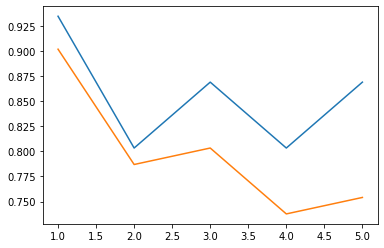

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20000)

# Define a list of k values to experiment with
k_values = [1, 2, 3, 4, 5]

# Define a list of distance metrics to experiment with
distance_metrics = ['l1', 'l2']

# Dictionary to store test accuracies for different k values and distance metrics
test_accuracies = {}
l1=[]
l2=[]
# Loop through all possible combinations of k and distance metric
for k in k_values:
    for dist in distance_metrics:
        # Create a KNN classifier object with the given k and distance metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
        # Calculate the accuracy on the test data
        accuracy = knn.score(X_test, y_test)
        # Store the accuracy in the dictionary
        test_accuracies[(k, dist)] = accuracy
        if dist=='l1':
          l1.append(accuracy)
        else:
          l2.append(accuracy)
# Print the test accuracies for different k values and distance metrics
for k in k_values:  
    for dist in distance_metrics:
        print(f'k={k}, {dist} distance accuracy: {test_accuracies[(k, dist)]}')
print(l1)
print(l2)
plt.plot(k_values,l1)
plt.plot(k_values,l2)
plt.show()

In [76]:
new = pd.DataFrame.from_dict(test_accuracies,orient ='index')

In [77]:
new

0
(1, l1)  0.918033
(1, l2)  0.852459
(2, l1)  0.803279
(2, l2)  0.786885
(3, l1)  0.901639
(3, l2)  0.836066
(4, l1)  0.737705
(4, l2)  0.721311
(5, l1)  0.786885
(5, l2)  0.737705

In [78]:
import matplotlib.pyplot as plt


test_size 0.4
k=1, l1 distance accuracy: 0.860655737704918
k=1, l2 distance accuracy: 0.8524590163934426
k=2, l1 distance accuracy: 0.819672131147541
k=2, l2 distance accuracy: 0.8032786885245902
k=3, l1 distance accuracy: 0.8770491803278688
k=3, l2 distance accuracy: 0.8360655737704918
k=4, l1 distance accuracy: 0.7950819672131147
k=4, l2 distance accuracy: 0.7704918032786885
k=5, l1 distance accuracy: 0.8442622950819673
k=5, l2 distance accuracy: 0.7868852459016393
the size is 0.4 distane l1 [0.860655737704918, 0.819672131147541, 0.8770491803278688, 0.7950819672131147, 0.8442622950819673]
the size is 0.4 distane l2 [0.8524590163934426, 0.8032786885245902, 0.8360655737704918, 0.7704918032786885, 0.7868852459016393]


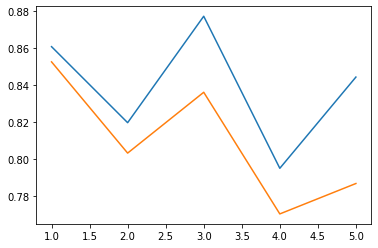

test_size 0.3
k=1, l1 distance accuracy: 0.9239130434782609
k=1, l2 distance accuracy: 0.9021739130434783
k=2, l1 distance accuracy: 0.8478260869565217
k=2, l2 distance accuracy: 0.8369565217391305
k=3, l1 distance accuracy: 0.8804347826086957
k=3, l2 distance accuracy: 0.8586956521739131
k=4, l1 distance accuracy: 0.8369565217391305
k=4, l2 distance accuracy: 0.8152173913043478
k=5, l1 distance accuracy: 0.8586956521739131
k=5, l2 distance accuracy: 0.8152173913043478
the size is 0.3 distane l1 [0.9239130434782609, 0.8478260869565217, 0.8804347826086957, 0.8369565217391305, 0.8586956521739131]
the size is 0.3 distane l2 [0.9021739130434783, 0.8369565217391305, 0.8586956521739131, 0.8152173913043478, 0.8152173913043478]


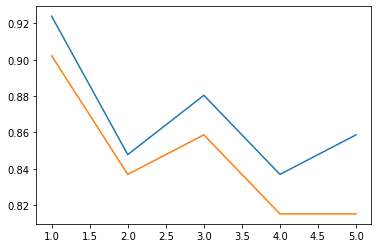

test_size 0.1
k=1, l1 distance accuracy: 0.9354838709677419
k=1, l2 distance accuracy: 0.9032258064516129
k=2, l1 distance accuracy: 0.9032258064516129
k=2, l2 distance accuracy: 0.8387096774193549
k=3, l1 distance accuracy: 0.9032258064516129
k=3, l2 distance accuracy: 0.8709677419354839
k=4, l1 distance accuracy: 0.9354838709677419
k=4, l2 distance accuracy: 0.9354838709677419
k=5, l1 distance accuracy: 0.967741935483871
k=5, l2 distance accuracy: 0.9032258064516129
the size is 0.1 distane l1 [0.9354838709677419, 0.9032258064516129, 0.9032258064516129, 0.9354838709677419, 0.967741935483871]
the size is 0.1 distane l2 [0.9032258064516129, 0.8387096774193549, 0.8709677419354839, 0.9354838709677419, 0.9032258064516129]


In [81]:
test_size=[0.4,0.3,0.1]
for i in test_size:
   print('test_size',i)
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=200000)
   k_values = [1, 2, 3, 4, 5]
   distance_metrics = ['l1', 'l2']
   test_accuracies = {}
   l1=[]
   l2=[]
   for k in k_values:
     for dist in distance_metrics:
        # Create a KNN classifier object with the given k and distance metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
        
        accuracy = knn.score(X_test, y_test)
        test_accuracies[(k, dist)] = accuracy
        if dist=='l1':
          l1.append(accuracy)
        else:
          l2.append(accuracy)
   for k in k_values:  
     for dist in distance_metrics:
        print(f'k={k}, {dist} distance accuracy: {test_accuracies[(k, dist)]}')
   print("the size is",i,'distane l1',l1)
   print("the size is",i,'distane l2',l2)
   plt.plot(k_values ,l1)
   plt.plot(k_values,l2)
   plt.show()